# Main class for running the molecule environment

In [1]:
import gym
from gym import wrappers, logger
from molecule_agent import MoleculeAgent
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import matplotlib.pyplot as plt
from collections import deque
from Chemistry import Mol
from rdkit import rdBase
rdBase.DisableLog('rdApp.error')

Welcome to TEDD, the Training Environment for Drug Discovery.
In order to run the environment, you will need to input a target molecule, a starting molecule and an optimisation goal.

Step 1) Choose target molecule: 
Input ‘1’ to SPECIFY a molecule.
Input ‘2’ to choose a RANDOM molecule.
Input: 2

Step 2) Choose starting molecule: 
Input ‘1’ to choose a CARBON molecule.
Input ‘2’ to choose a RANDOM molecule.
Input: 2

Step 3) Choose optimisation goal: 
Input a number from 0 to 100.
Input: 45

Environment initialiased.
Agent initialiased.

Starting molecule = C
Target molecule = CC34CCc1c(ccc2cc(O)ccc12)C3CCC4=O
Optimisation goal = 45.0

Setting initial state of environment.


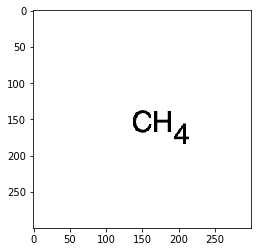

Episode: 1, Starting State: 0.0
Action:  5
State: 0.0 
Reward: 10 
Done: False 
Info: 


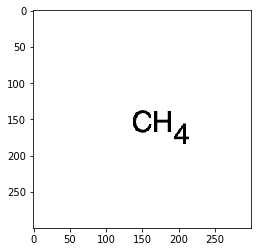

Action:  5
State: 0.0 
Reward: 10 
Done: False 
Info: 


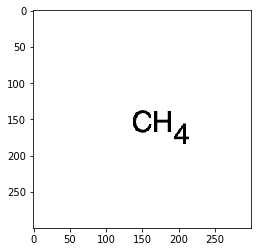

Action:  4
State: 0.0 
Reward: 10 
Done: False 
Info: 


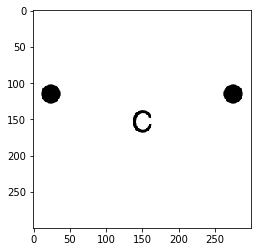

Action:  3
State: 0.2976 
Reward: 10 
Done: False 
Info: 


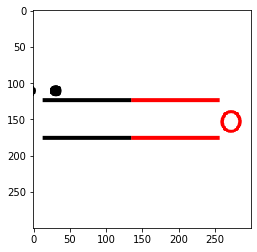

Action:  4
State: 0.2976 
Reward: 10 
Done: False 
Info: 


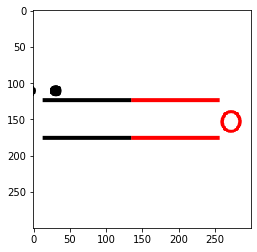

Action:  1
State: 0.2976 
Reward: -10 
Done: False 
Info: 


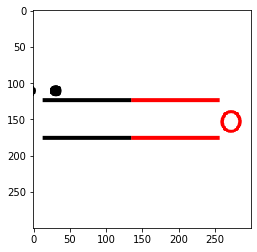

Action:  5
State: 0.2976 
Reward: -10 
Done: False 
Info: 


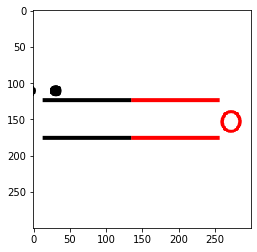

Action:  5
State: 0.2976 
Reward: -10 
Done: False 
Info: 


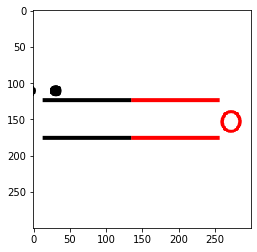

Action:  4
State: 0.2976 
Reward: -10 
Done: False 
Info: 


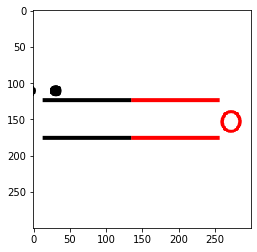

Action:  4
State: 0.2976 
Reward: -10 
Done: False 
Info: 


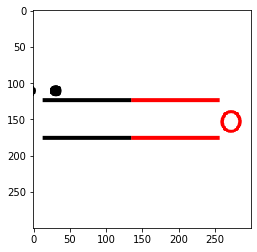

Action:  0
State: 0.8929 
Reward: 10 
Done: False 
Info: 


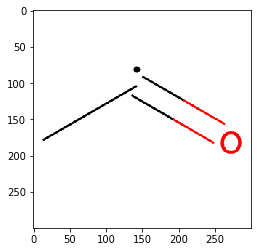

Action:  0
State: 1.034 
Reward: 10 
Done: False 
Info: 


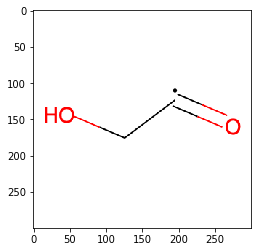

Action:  1
State: 1.034 
Reward: -10 
Done: False 
Info: 


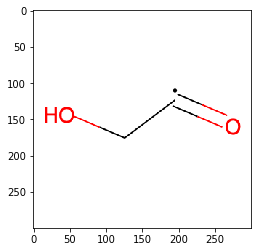

Action:  1
State: 1.034 
Reward: -10 
Done: False 
Info: 


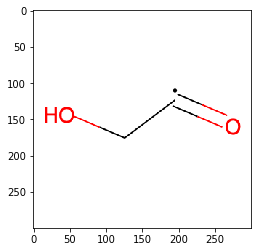

Action:  1
State: 1.034 
Reward: -10 
Done: False 
Info: 


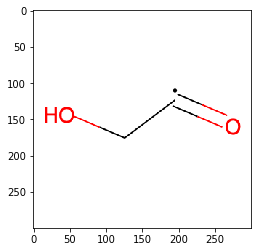

Action:  0
State: 1.4706 
Reward: 10 
Done: False 
Info: 


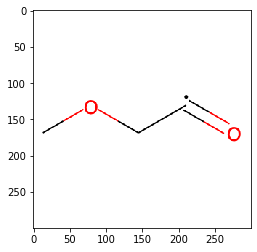

Action:  0
State: 1.909 
Reward: 10 
Done: False 
Info: 


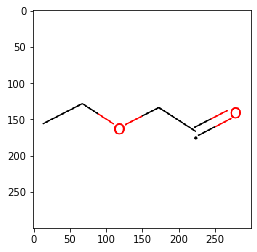

Action:  5
State: 1.4706 
Reward: 10 
Done: False 
Info: 


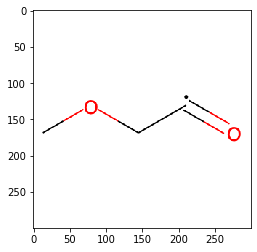

Action:  3
State: 1.4706 
Reward: -10 
Done: False 
Info: 


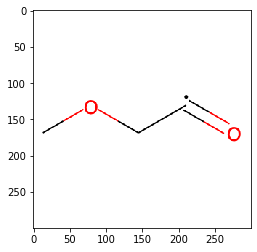

Action:  5
State: 1.034 
Reward: -10 
Done: False 
Info: 


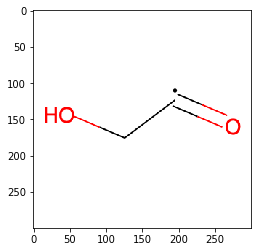

Setting initial state of environment.


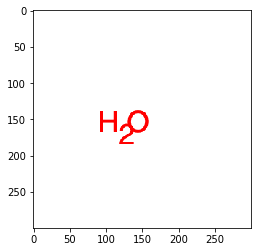

Episode: 2, Starting State: 0.0
Action:  5
State: 0.0 
Reward: -10 
Done: False 
Info: 


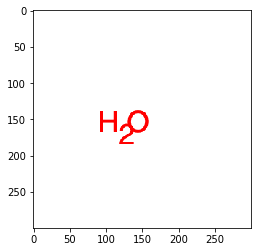

Action:  4
State: 0.0 
Reward: -10 
Done: False 
Info: 


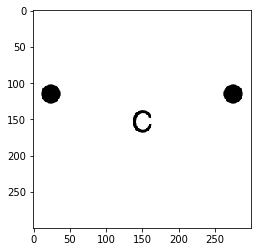

Action:  0
State: 0.2976 
Reward: 10 
Done: False 
Info: 


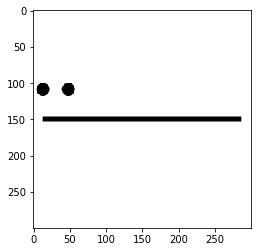

Action:  1
State: 0.5952 
Reward: 10 
Done: False 
Info: 


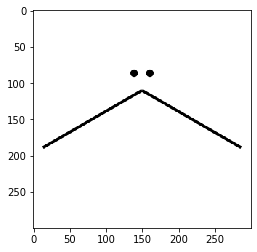

Action:  3
State: 1.4881 
Reward: 10 
Done: False 
Info: 


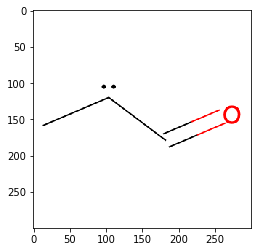

Action:  4
State: 1.4881 
Reward: 10 
Done: False 
Info: 


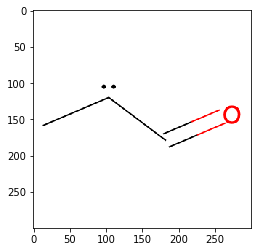

Action:  0
State: 1.62 
Reward: 10 
Done: False 
Info: 


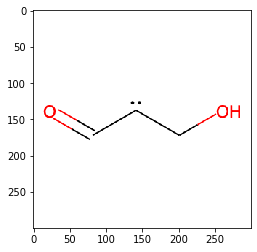

Action:  4
State: 1.62 
Reward: 10 
Done: False 
Info: 


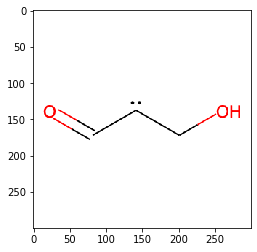

Action:  2
State: 2.0468 
Reward: 10 
Done: False 
Info: 


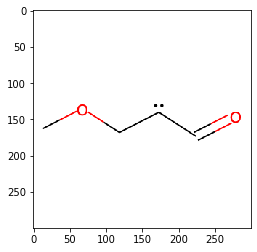

Action:  1
State: 2.0468 
Reward: -10 
Done: False 
Info: 


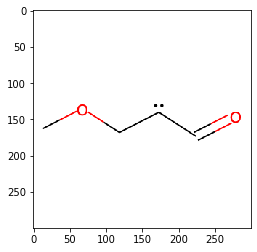

Action:  3
State: 2.0468 
Reward: -10 
Done: False 
Info: 


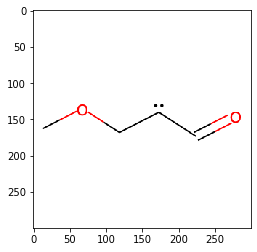

Action:  1
State: 2.0468 
Reward: -10 
Done: False 
Info: 


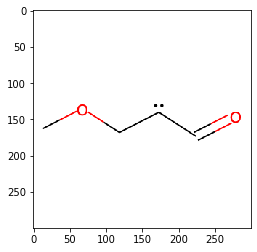

Action:  5
State: 1.62 
Reward: -10 
Done: False 
Info: 


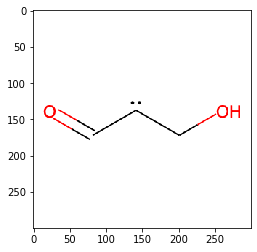

Action:  1
State: 1.62 
Reward: -10 
Done: False 
Info: 


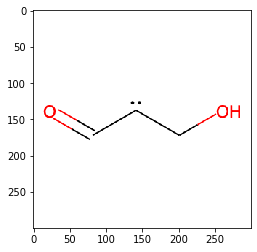

Action:  1
State: 1.62 
Reward: -10 
Done: False 
Info: 


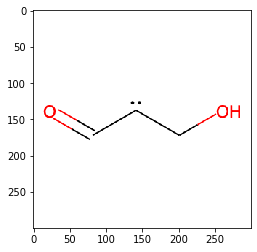

Action:  3
State: 1.62 
Reward: -10 
Done: False 
Info: 


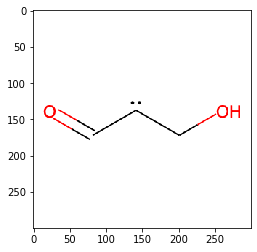

Action:  2
State: 2.0468 
Reward: 10 
Done: False 
Info: 


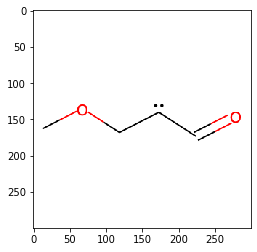

Action:  5
State: 1.62 
Reward: 10 
Done: False 
Info: 


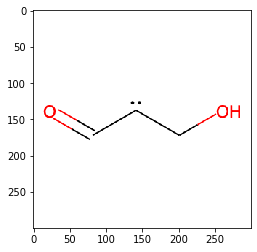

Action:  5
State: 1.4881 
Reward: 10 
Done: False 
Info: 


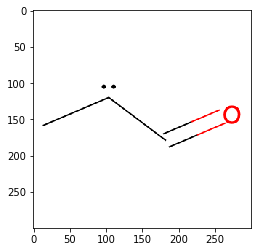

Action:  4
State: 1.4881 
Reward: 10 
Done: False 
Info: 


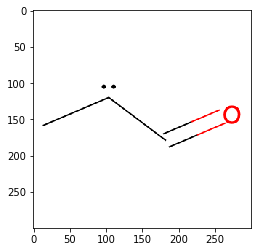

Optimisation Goal Unsuccessful, Similarity (%): 1.4881


In [3]:
def main():
    print("Welcome to TEDD, the Training Environment for Drug Discovery.")
    print("In order to run the environment, you will need to input a target molecule, a starting molecule and an optimisation goal.")
      
    molecule = Mol()
    # determine target molecule
    while True:
        print("\nStep 1) Choose target molecule: \nInput ‘1’ to SPECIFY a molecule.\nInput ‘2’ to choose a RANDOM molecule.")
        target_molecule = input("Input: ")
        if not(target_molecule == '1' or target_molecule == '2'):
            print("Incorrect Input.\n")
        elif target_molecule == '1':
            print("Input the target molecule.")
            target_molecule = input("Input: ")
            if molecule.is_valid(target_molecule):
                break
            else:
                print("Incorrect Input.\n")
        else:
            target_molecule = molecule.get_random_molecule(is_target=True)
            break
    molecule.set_target_molecule(target_molecule)
            
    # determine starting molecule
    while True:
        print("\nStep 2) Choose starting molecule: \nInput ‘1’ to choose a CARBON molecule.\nInput ‘2’ to choose a RANDOM molecule.")
        starting_molecule = input("Input: ")
        if not(starting_molecule == "1" or starting_molecule == "2"):
            print("Incorrect Input.\n")
        elif starting_molecule == '1':
            starting_molecule = "C" # get carbon molecule 
            break
        else:
            starting_molecule = molecule.get_random_molecule(is_target=False) # get random molecule 
            break
    molecule.set_start_molecule(starting_molecule)

    # determine optimisation goal
    while True:
        print("\nStep 3) Choose optimisation goal: \nInput a number from 0 to 100.")
        optimisation_goal = input("Input: ")
        try:
            optimisation_goal = float(optimisation_goal)
            if optimisation_goal < 0 or optimisation_goal > 100:
                print("Incorrect Input.\n")
            else:
                break
        except:
            print("Incorrect Input.\n")
    print()

    env = gym.make("gym_molecule:molecule-v0", mol = molecule, goal = optimisation_goal)
    print("Environment initialiased.")

    agent = MoleculeAgent(env.observation_space, env.action_space) # Create a new Molecule Agent object.
    print("Agent initialiased.\n")
    
    print("Starting molecule =", env.start_molecule)
    print("Target molecule =", env.target_molecule)
    print("Optimisation goal =", env.similarity)
    print()
    
    episode_count = 3
    reward = 0
    done = False
    
    for episode in range(1,episode_count):

        if done:
            break
        print("Setting initial state of environment.")    
        state = env.reset()
        print("Episode: " + str(episode) + ", Starting State: " + str(state))

        for step in range(1,21):
            action = agent.act(state, reward, done)
            print("Action: ", action) 

            state_next, reward, done, info = env.step(action)
            print("State:", state_next, "\nReward:", reward, "\nDone:", done,"\nInfo: ")

            agent.remember(state, action, reward, state_next, done)
            state = state_next

            env.render()

            if done:
                break
    
    if done:
        print("Optimisation Goal Successful - Episode: " + str(episode) + ", Step: " + str(step) + ", Similarity (%): " + str(state))
    else:
        print("Optimisation Goal Unsuccessful" + ", Similarity (%): " + str(state))

    env.molecule.save_modifications()
    agent.save_memory()
    env.close()
            
    
if __name__ == '__main__':
    main()

# Aspirin: O=C(C)Oc1ccccc1C(=O)O
# Start with: Oc1ccccc1C

## 